<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 13 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 6 April 2020, with material by James Loy, Simeon Kostandinov, and Avinash Sharma</div>


# A 2-layer Artificial Neural Network

<img src="https://c4.staticflickr.com/3/2656/4253587827_9723c3ffd3_z.jpg" width=400/>

*Photo courtesy of GE Healthcare, http://www.flickr.com/photos/gehealthcare/4253587827/ *

<img src="https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg"/>

## Neural Networks

Most introductory texts to Neural Networks brings up brain analogies when describing them. Without delving into brain analogies, we can simply describe Neural Networks as a mathematical function that maps a given input to a desired output, kust like our winnow.

This is what we worked on last, our good little caterpillar brain, or *winnow*:

<br />
<center>
<img src="ipynb.images/winnow-ann.png" width=500 />
</center>

Remember how simple the learning algorithm was? We start with a random weights matrix $W$, we evaluate $\hat{y} = W$@$x$ where x is a row of observations, and we compare $\hat{y}$ to the label $y$. If $\hat{y}$ is too large compared to $y$ we halve the weights that multiply non-zero components of $x$. If $\hat{y}$ is too small compared to $y$, we double the weights that multiply the non-zero components of $x$.

In general, Neural Networks are a little bit *deeper* than one layer and consist of the following components:
- An input layer, x
- ***An arbitrary amount*** of hidden layers, the more the deeper the network
- An output layer, ŷ
- A set of weights and biases between each layer, W and b
- And also, ***new new new***: A choice of activation function for each hidden layer, σ. In this notebook, we’ll use a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.

<br />
<center>
<img src="ipynb.images/2-layer-ann.png" width=400 />
</center>

What is an **activation function**? We don't just look at the *linear output* of the combined output of all neurons from the upstream layer, but a function $\sigma()$ of that, which usually **discounts** small inputs, and **enhances** larger inputs.  

Now, are we ready for a bit of *linear algebra*?

Here is our constructor class: We randomize the weights of our two layers in the constructor. You can think of the weights as either stored on the nodes, or the edges of our network.

In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)

If the input is $x$, the output ŷ of a simple 2-layer Neural Network like the one above is:

$$\hat{y_1} = \sigma(W_1x + b_1)$$

$$\hat{y} = \sigma\;(W_2\hat{y_1} + b_2)$$

Like in our Winnow lab, $W$ is a matrix, $x$ and $\hat{y}$ are vectors, and $b_i$ is a vector that is called a **bias**: Even if the input $x = 0$, then the output $\hat{y}$ is the bias. Our output is never 0. You may think of the bias as *long-term memory*.

Thus:

$$\hat{y} = \sigma\;(W_2\sigma(W_1x + b_1) + b_2)$$

You might notice that in the equation above, the weights $W$ and the biases $b$ are the only variables that affect the output $\hat{y}$.

## The activation function and why it cannot be linear

So what does an activation function $\sigma$ do? Why does a neuron, artifical or not, need it? The input is a *weighted sum* of the output of the previous neuronal layers, plus a bias and then decides whether that input is enough to *excite* the neuron to fire.

>**QUESTION**: How did we decide to "fire" the neurons in our Caterpillar brain?

This is a step function:

<br />
<center>
<img src="ipynb.images/step-function.png" width=400 />
</center>

The associated activation function A = is **activated** if Y > threshold, else not. This is a **binary** activation.

There are certain drawbacks with this. We are wasting away a lot of potential since we have a reservoir of neurotransmitters, and we are essentially saying they're either completley on, or completely off. Like black or white with no colors in between. So there's waste.

Can we do better? How about a linear function like $y = cx$?. This is a straight line function where activation is proportional to input. This way, it gives a range of activations. 

If you;ve read a bit about neural networks, you know gradient descent is how we're going to train. Then you notice that for this function, the derivative is a constant. The derivative with respect to $x$ is $c$. That means, the gradient has no relationship with $x$. It is a constant gradient and the descent is going to be on constant gradient. If there is an error in prediction, the changes made by back propagation are constant and do not depend on the change in input delta$(x)$.

Hmm. Not good.

There is another problem too. Think about connected layers. Each layer is activated by a linear function. That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function.

No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer! Pause for a bit and think about it.

That means these two layers (or N layers) can be replaced by a single layer and we just lost the ability of stacking layers this way. No matter how we stack, the whole network is still equivalent to a single layer with linear activation (a combination of linear functions in a linear manner is still another linear function), just like our *winnow*. Not that we don't like our little caterpillar brain, but we came to class today to see if we can transform into something smarter, like a *butterfly*!

So let's go looking for non-linear.

>**Student**: Professor, we only studied *linear* algebra, are you saying we're going to have to study non-linear algebra, too? My math is not that good!

>**Professor**: No worries, little caterpillar-soon-to-be-butterfly, this will be the only non-linear part in the whole story, you'll be able to handle it. But you *need to freshen up on how to [compute derivatives of functions](https://www.mathsisfun.com/calculus/derivatives-introduction.html)*.

### The sigmoid
Here is a non-linear function that looks a bit like $y = cx$. It's called the **sigmoid function**. It turns out to be a good approximation of the *real* activation function in animal neurons:

<br />
<center>
<img src="ipynb.images/sigmoid.png" width=500 />
</center>

What are its advantages? Combinations of this function are also nonlinear! Great. Now we can stack layers..

Also, for values of $x$ between -2 and 2, $y$ values are very steep. Which means, any small changes in the value of $x$ in that region will cause the value of $y$ to change significantly. That means this function has a tendency to bring $y$ values to either end of the curve. Looks like it’s good for a classifier to me, aking clear distinctions on prediction!

Another advantage of the sigmoid is, unlike linear functions, the output is always going to be in range $(0,1)$ compared to $(-\infty, \infty)$ of linear functions! And you know how much this professor loves his probabilities and absolutely adores the range $(0,1)$, right? 

>**NOTE**: There is a little problem, though. Towards either end of the sigmoid function, the $y$ values tend to respond very less to changes in $x$. What does that mean? The gradient in those regions is going to be small. This will give rise to a problem called [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem): When the activations reach the *near-horizontal* part of the curve, the gradient is small or has vanished and the network refuses to learn further or becomes drastically slow in its learning.

We'll stick with the sigmoid for now, but let's briefly mention two other options:

### The hyperbolic tangent

The hyperbolic tangent is just a rescaled version of the simgoid:

$$tanh(x) = 2\sigma(2x) - 1$$

<br />
<center>
<img src="ipynb.images/hyperbolic-tangent.png" width=400 />
</center>

### The Rectified Linear Unit (ReLU)

The ReLU is almost linear, but not really:

<br />
<center>
<img src="ipynb.images/relu.jpg" width=400 />
</center>

The ReLU has some advantages, namey the sparsity of its activations. 

Imagine a big neural network with a lot of neurons. Using a sigmoid or tanh will cause almost all neurons to fire in an analog way. That means almost all activations will be processed to describe the output of a network. In other words the activation is dense. This costs energy, and mammals like to conserve energy (a nice way of saying *lazy*). Ideally, we want only a few neurons in the network to activate, thereby making the activations sparse and efficient.

ReLu give us this benefit. Imagine a network with random initialized weights: Almost 50% of the network yields 0 activation because of the characteristic of ReLu of having output 0 for negative values of $x$! This means a fewer neurons are firing (sparse activation) and the network is light. Woah, nice! ReLu seems to be awesome! 

>**Leaky RELU**: The ReLU is not invincible, either. Because of the horizontal line for negative $x$, the gradient can go to 0. For activations in that region the gradient will be 0, so weights will not get adjusted during learning. That means, those neurons will stop responding to variations in error/input. This is called dying ReLu problem. This problem can cause several neurons to just die and not respond, making a substantial part of the network passive. That is why there are variations of ReLu to mitigate this issue: They simply turn the horizontal line into a non-horizontal line, for example $y = 0.01x$ for $x<0$ (slightly inclined). This is called *leaky ReLu*. The main idea is to let the gradient be non zero and recover during training.

Moreover, ReLu is less computationally expensive than tanh and sigmoid because it involves *simpler* mathematical operations. Math takes energy, even for smart brains!


### Back to the sigmoid
Let's just stick with the sigmoid, for now! 

>**NOTE**L To be precise, **sigmoid** is a general class of curves that *are S-shaped*. That's the actual definition. We often use the term sigmoid to refer to the **logistic function**, but that's actually just a single example of a sigmoid. The hyperbolic function also defines a sigmoid curve! So we should really say: Here is the *logistic*. But unfortunately, the sigmoid has stuck to the logistic in Machine Learning. But be careful in math that is not correct!

So here's the "*sigmoid*" (a.k.a. *logistic*) function in python:

In [6]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

And here is its derivative:

<br />
<center>
<img src="ipynb.images/sigmoid-derivative.png" width=600 />
</center>

We derive a formula for the derivative of the sigmoid:

$$\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}$$

And we write the equivalent python function:

In [7]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

>**NOTE**: Why do we need the derivative? Because we're going to improve our Caterpillar-brain learning so that now we increase or decrease the weights based on the *slope* of the input! Remember how Varsha asked "professor, why don't we just *add* something rather than multiplying?". Yes, we could add something, but what? The answer is somethign proportional to the slop of the input!

## Learning (Training)
Naturally, the values for the weights and biases determines the *strength* of the predictions. The process of fine-tuning the weights and biases from the input data is known as *learning*, or *training the neural network*, just like we trained our Caterpillar brain using the Winnow algorithm.

Each iteration of the training process consists of the following steps:

- Calculating the predicted output $\hat{y}$, known as **feedforward**, in order to see how it compares to the *label*

- Updating the weights and biases, known as **backpropagation** in order to bring the output *closer* to the *label*

The sequential graph below illustrates the process:

<br />
<center>
<img src="ipynb.images/ff-bp.png" width=1000 />
</center>

We can also represent our graph like this. This is called a 3-4-1 neural net architecture:

<br />
<center>
<img src="ipynb.images/3-4-1-ann.png" width=400 />
</center>

We use both subscripts and superscripts as indexes. The subscripts are the components of the vector, and the superscripts are the layer components. Superscripts are *not* powers!

So $x$ is the input vector, no activation function $\sigma$ is applied, and the activation vector $a^1 = x$. As we dot the vector $x$ with the Weights matrix $W^1$ just as we did with the Winnow ($x$@$W$), this produces the vector $z$, when mapped into the activation function $\sigma$, it produces the activation vector $a^2$. Then, $a^2$ gets dotted with the Weights matrix $W^2$ ($a^2$@$W^2$), then passed into the last activation function to produce the scalar $a^3 = \hat{y}$, which we compare with label $y$.

Note we neglected the contribution of the bias $b$ in both layers!

When we neglect $b$:

$$z = W^1 \;x$$

and

$$y = W^2\;a^2 = W^2\;\sigma(z)$$

## Feedforward

As we’ve seen in the sequential graph above, feedforward is just simple calculus and for a basic 2-layer neural network, the output of the Neural Network is:

$$\hat{y} = \sigma\;(W_2\sigma(W_1x + b_1) + b_2)$$

So let’s add a feedforward function in our python code to do exactly that. 

For simplicity, let's assume we have no long-term memory and the biases $b$ are 0.

In [8]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

Witness how simple and clean our formulas look, now that we've studied **linear algebra** we represent `self.input` as a *vector* and *self.weights* as a *vector*, so that a complex formula like so:

$$\sum_{i=\text{features}} \text{self.input}_i * \text{self.weights1}_i$$

is just simply:
```(python)
np.dot(self.input, self.weights1)
```

## Loss function

We need a way to evaluate the ***goodness*** of our predictions (i.e. how far off are our predictions). With the Winnow, we just evaluated when `prediction != label`. The Loss Function allows us to do a more refined evaluation.

There are many available loss functions, and the nature of our problem should dictate our choice of loss function. Here, we’ll use a simple sum-of-squares error as our loss function: The sum-of-squares error is simply the sum of the difference between each predicted value $\hat{y}$ and the actual value $y$. The difference is squared so that we measure the *absolute value* of the difference:

$$\text{sum-of-squares-error} = \sum_{j=\text{observations}} (y_j - \hat{y_j})^2$$

Our goal in training is to find the best set of weights and biases that minimizes the loss function.

## Backpropagation

Now that we have a way to measured the error of our prediction (loss), we need to find a way to propagate the error back into layer 2, then layer 1, and update weights and biases in the process.

In order to know the appropriate amount to adjust the weights and biases by, we will use some math: We'll compute the **derivative of the loss function with respect to the weights and biases**.

Recall that the derivative of a function is simply the slope of the function.

<br />
<center>
<img src="ipynb.images/gradient-descent.png" width=800 />
</center>

If we have the derivative, we can simply update the weights and biases by increasing/reducing with it. Remember our Winnow, where we divided by 2 or multiplied by 2? Now we're doind something more refined: If the slope is *big*, we'll increase or decrease by *more* than 2, and if the slope is *small*, by *less* than 2. In other words, we will increase or decrease weights not by 2, but based on the derivative of the output. This is known as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

The derivative of a function measures the sensitivity to change of the function value (output value) with respect to a change in its argument (input value). We already talked about this in the context of the sigmoid and the vanishing gradient problem. Here, if the function is the Loss function and the argument is the weights, the gradient shows ***how much the weights needs to change by (in positive or negative direction) to minimize the Loss function***.

> Backpropagation aims to minimize the loss function by adjusting the network’s weights and biases. The level of adjustment is determined by the derivative (or **gradient**) of the loss function with respect to those parameters.

So we will update our weights (and biases) thusly:

$$w \rightarrow w + \frac{\partial L}{\partial W}$$

$$b \rightarrow b + \frac{\partial L}{\partial b}$$

But there's a problem! We can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function *does not contain the weights and biases*! 

Therefore, we need the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to help us calculate it. We call $z$ the intermediate output ($ x \rightarrow z \rightarrow \hat{y}$) between the two layers. Now let's simplify our equations to get an idea of how the chain rule works:

<br />
<center>
<img src="ipynb.images/chain-rule.png" width=800 />
</center>

Wow, that looks simple and that's what some textbooks will show you. but unfortunately, it's wrong! Here is one mistake, and it's not the only one: 

$$\hat{y} = \sigma(W^2 z)$$ 

So: 

$$\frac{\partial \hat{y}}{\partial z} = W^2 * \sigma'(W^2 z)$$

We need to be *very careful* when doing math!

Since we have *two* sets of weights, we need *two* derivations of $\text{Loss}(y, \hat{y})$:

>**CLASS WORK**: Please derive the second equation! The first one only needed to go up to an equation that involves $W^1$. What do you think the second one needs to go up to? What other variables need to be involved? Please write down the markdown and share it with me on blackboard!

$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^2} = 
\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial\hat{y}}{\partial W^2} =
\sum_i \; 2(y - \hat{y}) * \frac{\partial\hat{y}}{\partial W^2}$$

$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^1} = 
\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial \hat{y}}* \frac{\partial\hat{y}}{\partial z} * \frac{\partial z}{\partial W^1} =
\sum_i \; 2(y - \hat{y}) * \frac{\partial\hat{y}}{\partial z} * 
\frac{\partial z}{\partial W^1}$$

$$z = \sigma(W^1 x)$$

$$\hat{y} = \sigma(W^2 z)$$

Note that we carried out the chain rule a bit further in order to get to the first layer of weights with the second equation above.

Plugging in the last two equations in the first two:


$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^2} = 
\sum_i \; 2(y - \hat{y}) * \frac{\partial \;\sigma(W^2 z)}{\partial W^2}$$

$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^1} = 
\sum_i \; 2(y - \hat{y}) * \frac{\partial\;\sigma(W^2 z)}{\partial z} * \frac{\partial \;\sigma(W^1 x)}{\partial W^1}$$

Do you remember the function composition rule from math class: If $f(x) = h(g(x))$, then $f'(x) = h'(g(x)) * g'(x)$.

So with the change of variable $W^2 \rightarrow q$:

$$\frac{\partial \;\sigma(W^2 z)}{\partial W^2} = \frac{\partial \;\sigma(zq)}{\partial q} = 
\sigma'(zq) * \frac{\partial \;(zq)}{\partial q} = \sigma'(zq) * z$$

Similarly,

$$\frac{\partial \;\sigma(W^1 x)}{\partial W^1} = \frac{\partial \;\sigma(xq)}{\partial q} = 
\sigma'(xq) * \frac{\partial \;(xq)}{\partial q} = \sigma'(xq) * x$$

And also:

$$\frac{\partial \;\sigma(W^2 z)}{\partial z} = W^2 * \sigma'(W^2 z)$$

So the first equation becomes:

$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^2} = 
\sum_i \; 2(y - \hat{y}) * \sigma'(W^2 z) * z$$

And the second equation:

$$\frac{\partial \;\text{Loss}(y, \hat{y})}{\partial W^1} = 
\sum_i \; 2(y - \hat{y}) * \sigma'(W^2 z) * W^2 * \sigma'(W^1 x) * x$$

Now that we have that, let’s add the backpropagation function into our python code.

In [10]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def reload(self, x):
        self.input = x
        
    def predict(self):
        return self.output

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        #d_weights1 = np.dot(self.input.T,  
        #                    np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * 
        #                    sigmoid_derivative(self.layer1))
        
        sigmoid_derivative_1 = sigmoid_derivative(np.dot(self.input, self.weights1))
        sigmoid_derivative_2 = sigmoid_derivative(np.dot(self.layer1, self.weights2))
        d_weights2 = np.dot(self.layer1.T, 
                            (2*(self.y - self.output) * sigmoid_derivative_2))
        d_weights1 = np.dot(self.input.T,  
                            np.dot(2*(self.y - self.output) * sigmoid_derivative_2, self.weights2.T) * 
                            sigmoid_derivative_1)

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

## Putting it all together

Now that we have our complete python code for doing feedforward and backpropagation, let’s apply our Neural Network on an example and see how well it does. Instead of a Caterpillar, let's assume we are R2D2, and we *only* have 3 feet:

<br />
<center>
<img src="ipynb.images/r2d2.gif" width=200 />
</center>

This is the feet-sensory input for R2D2, and the forward/backward decision vector:

<br />
<center>
<img src="ipynb.images/ann-1-iniput.png" width=400 />
</center>

Our Neural Network should learn the ideal set of weights to represent this function. Note that it isn’t exactly trivial for us to work out the weights just by inspection alone.

Let’s train the Neural Network for 1500 iterations and see what happens. Looking at the loss per iteration graph below, we can clearly see the loss monotonically decreasing towards a minimum. This is consistent with the gradient descent algorithm that we’ve discussed earlier.

## Training R2D2

In [11]:
import numpy as np
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(400):
    nn.feedforward()
    nn.backprop()

print(nn.output)

[[0.05177131]
 [0.92953208]
 [0.92933693]
 [0.08047295]]


Let's take notice of the shape of our inputs. We'll need that for later.

In [12]:
X.shape

(4, 3)

In [13]:
y.shape

(4, 1)

## Results

If we plot the Loss at each iteration, we find:

<br />
<center>
<img src="ipynb.images/ann-1-loss.png" width=600 />
</center>

Let’s look at the final prediction (output) from the Neural Network after 1500 iterations.
Predictions after 1500 training iterations

<br />
<center>
<img src="ipynb.images/ann-1-predictions.png" width=200 />
</center>

Wow, not bad! Our feedforward and backpropagation algorithm trained the Neural Network successfully and the predictions converged on the true values. We taught R2D2 how to walk, yay!

Note that we iterated 1500 times over our data though! Compare that to the Winnow, where we iterated how many times over our data?

Note that the slight difference between the predictions and the actual values is *desirable*, as it prevents overfitting and allows our Neural Network to generalize better to unseen data.

# Setosa, Versicolor, Virginica

I feel so much smarter with that extra brain layer, dont you? I think we've transformed from little [caterpillars](https://i.redd.it/vsvvs1tlat021.gif) to beautiful [butterflies](https://steemitimages.com/0x0/https://2.bp.blogspot.com/-I40rsv5sDIs/V_jmR63qOuI/AAAAAAAAGZk/TTZsMLWQLE8TGTbMZEJSIA10KlYoo7utgCLcB/s1600/butterfly3.gif)!

<center>
<img src="ipynb.images/butterfly.gif" width=400 />
</center>

Now that we're a butterfly, we're after flowers! So let's train our butterfly brain with the famous [Iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) dataset. You may download it from UCI and load it into a pandas data frame, but my version of `iris.data` on blackboard includes legend!

In [20]:
import pandas as pd
data = pd.read_csv("data/iris.data")
data.tail(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,flower
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
data.groupby(' flower').size()

 flower
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [27]:
import matplotlib.pyplot as plt

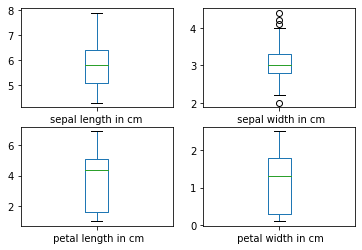

In [28]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

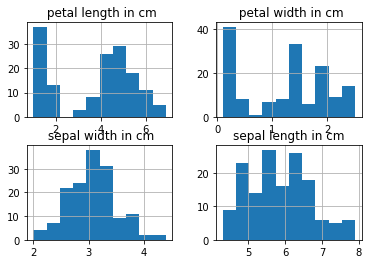

In [29]:
data.hist()
plt.show()

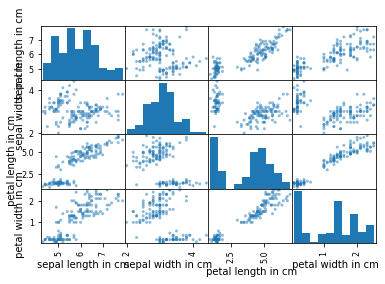

In [32]:
# scatter plot matrix
pd.plotting.scatter_matrix(data)
plt.show()

Let's focus on **petal length** and **petal width**. Easiest features to focus on for teaching our little butterfly!

Sepals (collectively called the calyx) are modified leaves that encase the developing flower. Tough to see. Sepals (collectively called the calyx) are modified leaves that encase the developing flower. Tough to see.

<br />
<center>
<img src="ipynb.images/Petal-sepal.jpg" width=300 />
</center>

Let's break up our data into ***numeric*** independent and dependent variables:

In [33]:
X = np.delete(data.values, [0, 1, 4], 1)
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1.0, 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [34]:
data2 = data.copy()
data2['flower'] = [0 if f == 'Iris-setosa' else 1 for f in data2[' flower']]
y = np.delete(data2.values, [0, 1, 2, 3, 4], 1).flatten()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

How about we prepare to add some *more* neurons in the hidden layer of the butterfly brain?

In [36]:
class NeuralNetwork2:
    def __init__(self, x, y, n):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],n) 
        self.weights2   = np.random.rand(n,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def reload(self, x):
        self.input = x
        
    def predict(self):
        return self.output
    
    def weights1(self):
        return self.weights1
    
    def weights2(self):
        return self.weights2

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        #d_weights1 = np.dot(self.input.T,  
        #                    np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * 
        #                    sigmoid_derivative(self.layer1))
        
        sigmoid_derivative_1 = sigmoid_derivative(np.dot(self.input, self.weights1))
        sigmoid_derivative_2 = sigmoid_derivative(np.dot(self.layer1, self.weights2))
        d_weights2 = np.dot(self.layer1.T, 
                            (2*(self.y - self.output) * sigmoid_derivative_2))
        d_weights1 = np.dot(self.input.T,  
                            np.dot(2*(self.y - self.output) * sigmoid_derivative_2, self.weights2.T) * 
                            sigmoid_derivative_1)

        # The mod below fizes some strange uloop errors!
        
        # update the weights with the derivative (slope) of the loss function
        #print(self.weights1.shape, d_weights1.shape)
        self.weights1 = self.weights1 + d_weights1
        #print(self.weights2.shape, d_weights2.shape)
        self.weights2 = self.weights2 + d_weights2

Note that we added a parameter in our brain constructor to set the number of neurons in the hidden layer.

Also note that I added some mods to our matrix algebra in `backprop()`, as `NumPy` trips a bit over itself with the matrix extension of the `+=` operator.

Ok, let's peek at our data for a bit of EDA.

In [104]:
X.shape, y.shape

((150, 2), (150,))

In [105]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1.0, 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [106]:
y2 = np.reshape(y, (y.size, 1))
y2.shape

(150, 1)

Let's plot a *pair plot*:

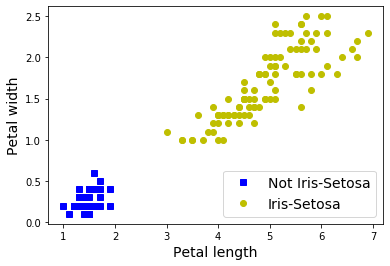

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

We see that based on petal length and width, the Setosas and Versicolor/Virginica Irises are *easily separable*. This is why I picked these two kinds. Had I picked the Versicolor vs Virginica/Setosa Irises, learning to differentiate them would be tougher. One extra layer of brain *may not be enough*.

>**CLASS WORK**: Please train/test split the data in the cell below into `X_train, X_test, y_train, y_test `:

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X_train.shape, y_train.shape

((120, 2), (120,))

In [110]:
y_train2 = np.reshape(y_train, (y_train.size, 1))
y_train2.shape

(120, 1)

This mod will save you from a lot of headaches. Since we are dealing with vector and matrix quantities, sometimes we need to help along `NumPy`..

In [111]:
def sigmoid(x):
    try:
        x = np.vectorize(round)(x)
        return 1.0/(1+ np.exp(-x))
    except:
        print(x)
        print(np.exp(-x))
        return 1.0/(1+ np.exp(-x))

In [112]:
print(X_train)

[[1.3 0.2]
 [1.3 0.2]
 [1.7 0.3]
 [5.3 1.9]
 [5.9 2.1]
 [1.6 0.2]
 [5.7 2.3]
 [4.4 1.4]
 [5.7 2.5]
 [1.6 0.2]
 [1.5 0.1]
 [4.1 1.3]
 [1.7 0.4]
 [1.4 0.2]
 [5.1 1.5]
 [1.4 0.3]
 [3.5 1.0]
 [4.5 1.5]
 [5.6 1.4]
 [1.9 0.2]
 [6.0 2.5]
 [5.4 2.3]
 [5.6 1.8]
 [4.4 1.3]
 [5.0 2.0]
 [5.6 2.1]
 [6.3 1.8]
 [4.8 1.8]
 [1.4 0.2]
 [6.0 1.8]
 [1.4 0.1]
 [1.4 0.2]
 [1.3 0.3]
 [4.6 1.3]
 [4.8 1.8]
 [1.2 0.2]
 [4.8 1.4]
 [4.4 1.4]
 [4.8 1.8]
 [1.4 0.2]
 [5.2 2.0]
 [5.0 1.9]
 [3.8 1.1]
 [1.3 0.2]
 [1.0 0.2]
 [1.1 0.1]
 [4.6 1.4]
 [4.1 1.0]
 [4.5 1.5]
 [5.1 1.9]
 [4.2 1.3]
 [6.1 1.9]
 [4.2 1.5]
 [6.9 2.3]
 [1.3 0.4]
 [1.4 0.2]
 [4.3 1.3]
 [5.4 2.1]
 [1.6 0.2]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.3]
 [1.5 0.3]
 [3.3 1.0]
 [5.9 2.3]
 [3.9 1.1]
 [6.7 2.0]
 [1.9 0.4]
 [4.5 1.5]
 [3.3 1.0]
 [6.7 2.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.4 0.3]
 [6.4 2.0]
 [5.5 1.8]
 [5.3 2.3]
 [5.7 2.1]
 [5.2 2.3]
 [4.7 1.6]
 [5.1 2.0]
 [5.8 1.6]
 [3.9 1.2]
 [1.2 0.2]
 [1.5 0.4]
 [4.1 1.3]
 [1.4 0.2]
 [1.5 0.1]
 [3.6 1.3]
 [4.0 1.3]
 [4.9 1.8]

In [113]:
y_train.shape

(120,)

In [114]:
X_train.shape

(120, 2)

Let's do some EDA:

In [115]:
# double[] vector
def ShowVector(vector, decimals, valsPerRow, newLine):
    frmt = '%.' + str(decimals) + 'f'
    for i in range(len(vector)):
        print(frmt % vector[i] + " ", end='')
    if (newLine): print("")

# int[][] matrix
def ShowMatrix(matrix, decimals, numRows, indices):
    frmt = '%.' + str(decimals) + 'f'
    for i in range(numRows):
        if (indices):
            print("[" + '%02d' % i + "]   ", end='')
        for j in range(len(matrix[i])):
            print(frmt % matrix[i][j] + " ", end='')
        print("")
    print("")

In [116]:
print("First few rows of training data are:")
ShowMatrix(X_train, 2, 10, True)

First few rows of training data are:
[00]   1.30 0.20 
[01]   1.30 0.20 
[02]   1.70 0.30 
[03]   5.30 1.90 
[04]   5.90 2.10 
[05]   1.60 0.20 
[06]   5.70 2.30 
[07]   4.40 1.40 
[08]   5.70 2.50 
[09]   1.60 0.20 



In [117]:
print("First few rows of testing data are:")
ShowMatrix(X_test, 2, 10, True)

First few rows of testing data are:
[00]   4.30 1.30 
[01]   4.70 1.40 
[02]   5.60 2.20 
[03]   5.10 1.60 
[04]   4.90 1.80 
[05]   4.40 1.20 
[06]   5.50 1.80 
[07]   1.60 0.60 
[08]   1.50 0.20 
[09]   1.50 0.40 



Let's examine how balanced our training data is.

>**CLASS WORK**: Please write down a single like of code below that will reveal how "*balanced*" the data is. Why is that important?

In [118]:
sum(y_train), len(y_train)

(77, 120)

You've come a *long way*, little caterpillar!
<center>
<img src="ipynb.images/butterfly2.gif" width=400 />
</center>

>**CLASS WORK**" Train our little butterfly brain to distinguish an Irish Setosa from other Irises. ***You*** decide how many neurons are required in the hiden layer!

But wait, please *resize* the label to the correct dimensions, first.

In [124]:
y_train2 = np.reshape(y_train, (y_train.size, 1))

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
X_train2 = scaler.transform(X_train)
print(X_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.22188787  0.11008189]
 [ 1.61230796  1.18405156]
 [ 0.39569038  0.37857431]
 [-1.4002689  -1.36662641]
 [ 1.67024213  1.04980535]
 [ 0.1639537  -0.29265674]
 [-1.4002689  -1.36662641]
 [-1.45820307 -1.2323802 ]
 [-1.11059804 -1.09813399]
 [-0.18365132 -0.29265674]
 [ 0.62742706  0.78131293]
 [-1.11059804 -1.36662641]
 [-1.28440056 -1.36662641]
 [-1.22646639 -0.96388778]
 [ 0.22188787  0.11008189]
 [-1.34233473 -1.36662641]
 [ 0.22188787 -0.02416432]
 [ 1.67024213  1.31829777]
 [-1.4002689  -1.36662641]
 [ 0.27982204  0.11008189]
 [ 0.68536123  1.04980535]
 [-1.4002689  -1.36662641]
 [ 0.56949289  0.78131293]
 [ 0.7432954   0.91555914]
 [ 0.10601953 -0.29265674]
 [ 0.39569038  0.37857431]
 [ 0.91709792  1.45254398]
 [ 0.10601953  0.11008189]
 [-1.22646639 -1.09813399]
 [-0.29951966 -0.29265674]
 [ 0.85916375  0.91555914]
 [-1.4002689  -1.36662641]
 [-1.51613724 -1.36662641]
 [-0.00984881 -0.15841053]
 [ 0.68536123  0.64706673

In [141]:
print(y_train)

[1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1]


In [143]:
nn = NeuralNetwork2(X_train2, y_train2, 25)

for i in range(2500):
    nn.feedforward()
    nn.backprop()

print(np.vectorize(round)(nn.output))

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]]


Hmm.. Did we forget to do something?.. If so, please do it below and retrain!

<div style="visibility: hidden; display:inline;">
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
X_train2 = scaler.transform(X_train)
print(X_train2)
</div>

Are the results impressive? Let's wait until we test on our test set, though!

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_test))
X_test2 = scaler.transform(X_test)
print(X_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.22188787  0.11008189]
 [ 1.61230796  1.18405156]
 [ 0.39569038  0.37857431]
 [-1.4002689  -1.36662641]
 [ 1.67024213  1.04980535]
 [ 0.1639537  -0.29265674]
 [-1.4002689  -1.36662641]
 [-1.45820307 -1.2323802 ]
 [-1.11059804 -1.09813399]
 [-0.18365132 -0.29265674]
 [ 0.62742706  0.78131293]
 [-1.11059804 -1.36662641]
 [-1.28440056 -1.36662641]
 [-1.22646639 -0.96388778]
 [ 0.22188787  0.11008189]
 [-1.34233473 -1.36662641]
 [ 0.22188787 -0.02416432]
 [ 1.67024213  1.31829777]
 [-1.4002689  -1.36662641]
 [ 0.27982204  0.11008189]
 [ 0.68536123  1.04980535]
 [-1.4002689  -1.36662641]
 [ 0.56949289  0.78131293]
 [ 0.7432954   0.91555914]
 [ 0.10601953 -0.29265674]
 [ 0.39569038  0.37857431]
 [ 0.91709792  1.45254398]
 [ 0.10601953  0.11008189]
 [-1.22646639 -1.09813399]
 [-0.29951966 -0.29265674]
 [ 0.85916375  0.91555914]
 [-1.4002689  -1.36662641]
 [-1.51613724 -1.36662641]
 [-0.00984881 -0.15841053]
 [ 0.68536123  0.64706673

One feedfoawrd steo through the neural network:

In [154]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1], dtype=object)

In [151]:
nn.reload(X_test2)
nn.feedforward()
prediction = nn.predict()
print(np.vectorize(round)(prediction))

[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [152]:
# returns double, int[][] trainData
def Accuracy(result, label):
    numCorrect = 0
    numWrong = 0
    
    for i in range(len(result)):
        if np.abs(result[i] - label[i]) < 0.01:
            numCorrect += 1
        else:
            numWrong += 1

    return (numCorrect * 1.0) / (numCorrect + numWrong)

In [153]:
testAcc = Accuracy(np.vectorize(round)(prediction), y_test)
print("Prediction accuracy on test data = " + str(testAcc))

Prediction accuracy on test data = 1.0


Good job, little butterfly!
<center>
<img src="ipynb.images/cartoon-butterfly.png" width=300 />
</center>

# Learning leveraging all 4 features

We reload the data.

In [147]:
import pandas as pd
data = pd.read_csv("data/iris.data")
data.head(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Let's remove one of the 3 flower classes. That will leave us with two flower classes.

In [68]:
data.columns

Index(['sepal length in cm', ' sepal width in cm', ' petal length in cm',
       ' petal width in cm', ' flower'],
      dtype='object')

In [69]:
data[' flower']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name:  flower, Length: 150, dtype: object

In [70]:
len(data)

150

>**CLASS WORK**: Filter out `Iris-versicolor` rows using `pandas` (keeping only `Iris-setosa` and `Iris-virginica`): 

In [ ]:
data2 = ...
data2.head(10)

In [ ]:
len(data2)

**CLASS WORK**: Transform string labels to integer labels: `Iris-setosa` $\rightarrow$ 0 and `Iris-virginica` $\rightarrow$ 1, using a new column `[flower]` (note that the old column is `[ flower]`: extra leading space character!).

In [ ]:
data2['flower'] = ...
data2

>**CLASS WORK**: Now drop label ` flower` and `flower` from the dataset (create a new dataframe):

In [ ]:
data3 = ...
data3.head(10)

Now split into training and test datasets using `sklearn`'s API:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3.values, data2['flower'].values, test_size=0.33, random_state=42)

Let's do some EDA:

In [ ]:
print("First few rows of training data are:")
ShowMatrix(X_train, 2, 10, True)

In [ ]:
print("First few rows of testing data are:")
ShowMatrix(X_test, 2, 10, True)

Let's examine how balanced our training data is.

>Why is that important?

In [78]:
trainlabels_balance = sum(y_train)
trainlabels_balance

69

In [ ]:
X_train

What else do you notice that we might want to address, with the data before we being learning?

>**CLASS WORK**: Now reshape the data according to how our neural network expects it. 

In [ ]:
y = np.reshape(y_train, ...)
y2 = np.reshape(y_test, ...)

In [ ]:
X_train.shape, y.shape

>**CLASS WORK**: Now train our butterfly brain to distinguish an Irish Setosa from an Iris Virginica, using *all four* features sepal length, sepal width, petal length, and petal width, according to the neural network parameters *you* picked. Please report training accuracy and test accuracy.

In [ ]:
trainAcc = Accuracy(nn.output, y)

nn.reload(X_test2)
nn.feedforward()
prediction = nn.predict()
testAcc = Accuracy(prediction, y2)

print("Prediction accuracy on training data = " + str(trainAcc))
print("Prediction accuracy on test data = " + str(testAcc))

## ~~Homework~~
- Can you help the butterfly correctly differentiate Iris Setosa from Iris Virginica *and* Iris Versicolor?
- What other activation function can you use besides the Sigmoid function?
- Can you use a *learning rate* when training the Neural Network, to help lazy butterflies learn better?